In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_BU = pd.read_csv('lat_lon_BU_data.csv')

ds = xr.open_dataset('BC_2014_energy production.nc')

In [2]:
df = pd.read_csv('global_power_plant_database_v_1_3/global_power_plant_database.csv')

/home/emfreese/anaconda3/envs/grid_mod/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
## https://pubs.acs.org/doi/abs/10.1021/es3003684 Table S1 
EF = np.exp(-3.64) #g/kg BC/coal

## https://www.nap.edu/read/9736/chapter/8 
HHF = 22.51 #GJ/t

#conversion factors
GJ_to_MwH = .28

Mw_to_MwH = 24 #daily

ton_to_kg = 0.001 #metric tons

In [18]:
mw_to_BC = Mw_to_MwH/GJ_to_MwH/HHF*ton_to_kg*EF #g/day

In [20]:
df_coal_china = df.loc[(df['country_long'] == 'China') & (df['primary_fuel'] == 'Coal')]

In [25]:
df_coal_china.loc[:,'BC_daily'] = df_coal_china.loc[:,'capacity_mw']*mw_to_BC

In [28]:
df_coal_china['BC_daily'].sum()

95.53787270495411

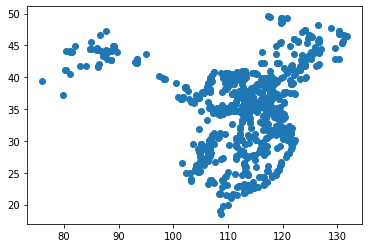

In [3]:
plt.scatter(df.loc[(df['country_long'] == 'China') & (df['primary_fuel'] == 'Coal')]['longitude'],df.loc[(df['country_long'] == 'China') & (df['primary_fuel'] == 'Coal')]['latitude'])

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,BC_daily
5074,CHN,China,APP Zhenjiang Jindong Mill power station,WRI1075566,290.0,32.1944,119.6998,Coal,NaN,NaN,...,NaN,NaN,NaN,1413.08,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,0.028990
5083,CHN,China,Aksu Cogen power station,WRI1075567,700.0,41.1542,80.3997,Coal,NaN,NaN,...,NaN,NaN,NaN,3410.88,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,0.069975
5088,CHN,China,Aksu Xuzhou power station,WRI1070222,400.0,41.0791,80.1685,Coal,NaN,NaN,...,NaN,NaN,NaN,1949.07,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,0.039986
5095,CHN,China,Alashan Left Qi Wusitai power station,WRI1070145,600.0,39.4463,106.6676,Coal,NaN,NaN,...,NaN,NaN,NaN,2923.61,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,0.059979
5101,CHN,China,Anda Cogen power station,WRI1075568,100.0,46.3996,125.2982,Coal,NaN,NaN,...,NaN,NaN,NaN,487.26,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,0.009996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9296,CHN,China,Zhunda power station,WRI1070383,600.0,39.7844,111.1595,Coal,NaN,NaN,...,NaN,NaN,NaN,2923.61,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,0.059979
9297,CHN,China,Zhungeer power station,WRI1070388,1320.0,39.8535,111.2563,Coal,NaN,NaN,...,NaN,NaN,NaN,6431.95,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,0.131953
9304,CHN,China,Zibo Hongda power station,WRI1075796,140.0,36.7833,118.0500,Coal,NaN,NaN,...,NaN,NaN,NaN,682.17,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,0.013995
9307,CHN,China,Zouxian power station,WRI1072548,4540.0,35.3256,116.9261,Coal,NaN,NaN,...,NaN,NaN,NaN,22122.01,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,0.453839
